In [ ]:
"""Atividade 7: Teoria dos Jogos."""
import matplotlib.pyplot as plt
import numpy as np
from numba import jit, numba

In [ ]:
@jit(nopython=True)
def play(current: np.ndarray, players: np.ndarray, b: float):
    """Rode uma partida de um jogador com seus vizinhos, com ganho `b`."""
    neighbors = [(1, 0), (0, 1), (-1, 0), (0, -1), (0, 0)]
    current_state = players[current[0]][current[1]]
    gains = 0
    for k in neighbors:
        other_state = players[(current[0] + k[0]) % N][(current[1] + k[1]) % N]
        if current_state and other_state:
            gains += 1.0
        elif not current_state and other_state:
            gains += b
    return gains

In [ ]:
@jit(nopython=True)
def simulate(players: np.ndarray, passos: int, b: float):
    """Simula uma execução do dilema do prisioneiro."""
    # É necessário fazer a cópia para não interferir em execuções posteriores
    copy = players.copy()
    for _ in range(passos):
        idx = np.random.randint(0, N, size=2)

        neighbor = np.random.randint(0, 4)
        idx_neighbor = np.array([(idx[0] + neighbor) % N, (idx[1] + neighbor) % N])

        gains = play(idx, copy, b)
        gains_neighbor = play(idx_neighbor, copy, b)

        w = 1 / (1 + np.exp((gains - gains_neighbor) / K))

        if np.random.rand() < w:
            copy[idx[0]][idx[1]] = copy[idx_neighbor[0]][idx_neighbor[1]]
    cooperadores = np.count_nonzero(copy)
    total = N * N
    return cooperadores / total

In [ ]:
@jit(nopython=True, parallel=True)
def plot_proportions(num_b: int, iterações: int):
    """Plota a evolução da proporção de cooperadores no final da simulação."""
    cooperadores = np.zeros(num_b)
    linspace = np.linspace(1, 2, num_b)
    for i in numba.prange(num_b):
        cooperadores[i] = simulate(players, iterações, linspace[i])
    return cooperadores, linspace

In [ ]:
K = 0.1
N = 200
ITERAÇÕES = 10_000_000
NUM_B = 100

Installed gtk3 event loop hook.


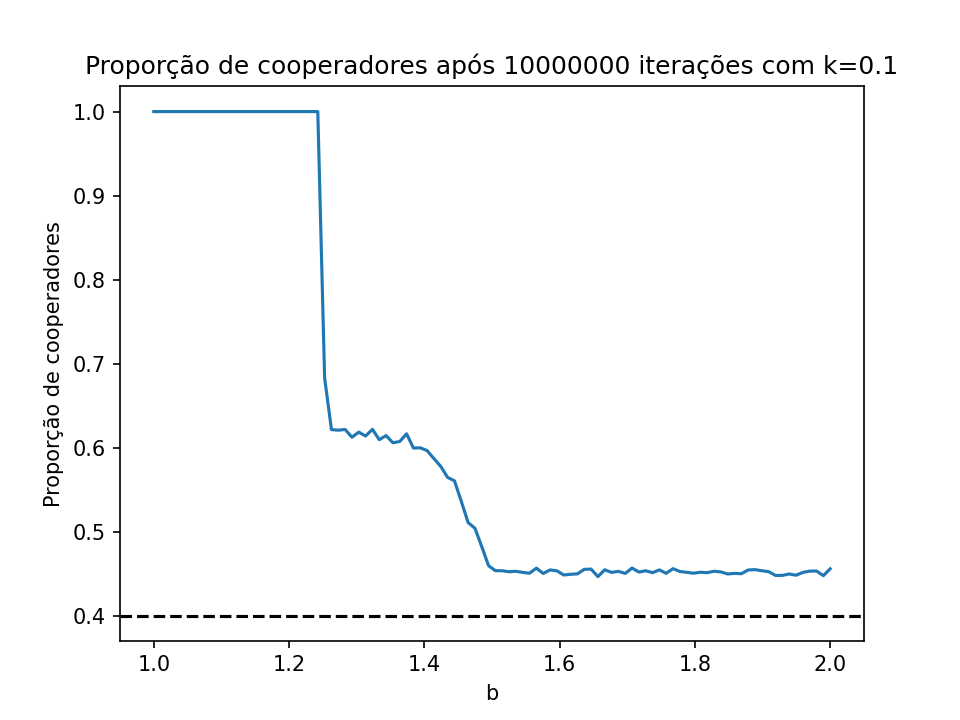

In [1]:
players = np.random.choice(a=[False, True], size=(N, N))

cooperadores, linspace = plot_proportions(100, ITERAÇÕES)
plt.title(f"Proporção de cooperadores após {ITERAÇÕES} iterações com k={K}")
plt.xlabel("b")
plt.ylabel("Proporção de cooperadores")
plt.plot(linspace, cooperadores)
plt.axhline(y=0.4, linestyle="dashed", color="black")

Foi escolhido o valor de $K = 0.1$ pois era um intermediário razoável entre os extremos da especificação (0.02 e 0.5).

É possível estimar que o valor de $b_1$ é próximo de 1.2, enquanto o valor de $b_2$ é próximo de 1.5. Não se sabe dizer porque houve a convergência para um valor próximo de $y = 0.4$, ao invés de 0.